<a href="https://colab.research.google.com/github/jpabloroa/Application/blob/master/Clase%2002.09.2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-production/csv/cross_country_production.csv', index_col=0)

In [5]:
df.head()

,country,gdp,labor,human_capital,physical_capital
country_code,,,,,
ALB,Albania,36103.042969,1.075898,2.964992,2.298183e+05
DZA,Algeria,507487.562500,11.273454,2.383965,2.487456e+06
AGO,Angola,227855.718750,16.644962,1.481984,1.371321e+06
ARG,Argentina,977420.562500,20.643215,3.096804,3.374819e+06
ARM,Armenia,43582.574219,0.966091,3.135995,9.894588e+04


In [16]:
metadata = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-production/csv/pwt_metadata.csv',index_col=0)['Values']
base_year = int(metadata['base_year'])
print('Base year for real GDP is:',base_year)

Base year for real GDP is: 2017


In [21]:
df['gdp_pw'] = df['gdp'] / df['labor']/1000

df ['physical_capital_pw'] = df['physical_capital'] / df['labor'] / 1000

alpha = 1/3

df['tfp'] = df['gdp'] / df['physical_capital']**alpha/(df['labor']*df['human_capital'])**(1-alpha)

df = df.sort_values('gdp_pw')

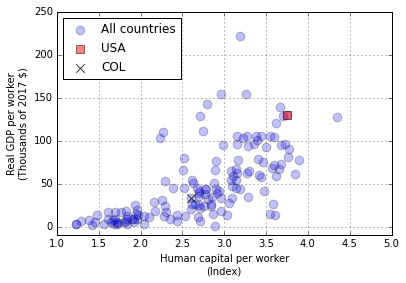

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['human_capital'],df['gdp_pw'], s=75, alpha=0.25, label='All countries')
ax.scatter(df['human_capital'].loc['USA'],df['gdp_pw'].loc['USA'],marker='s',c='r', s=75, alpha=0.5, label = 'USA')
ax.scatter(df['human_capital'].loc['COL'],df['gdp_pw'].loc['COL'],marker='x',c='black', s=75, alpha=0.75, label = 'COL')
ax.legend(scatterpoints = 1, loc='upper left')
ax.set_xlim([1, ax.get_xlim()[-1]])
ax.set_ylim([-10, ax.get_ylim()[-1]])
ax.set_xlabel('Human capital per worker\n(Index)')
ax.set_ylabel('Real GDP per worker\n(Thousands of '+str(base_year)+' $)')
ax.grid()